In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import lifelines


# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [3]:
#!pip install lifelines
from lifelines import KaplanMeierFitter


In [4]:
df_bank=pd.read_csv('/Users/kshitijmittal/Documents/UChicago Acad/02 Quarter 2/02 Linear Non-Linear/99 Project/Bank_Tele_Marketing/datasets/bank-additional/bank-additional-full.csv', sep=";")

In [5]:
df_bank['target'] = df_bank['y'].map({'no': 0, 'yes':1})
df_bank.head()
df_bank.drop(['y'],axis=1, inplace=True)

In [6]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Plotting Kaplan Meier for the entire dataset

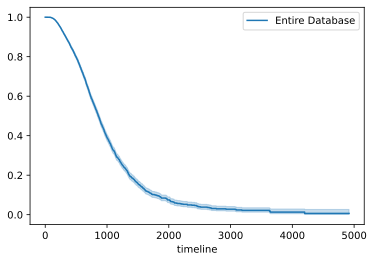

860.0

In [7]:
kmf = lifelines.KaplanMeierFitter()
kmf.fit(df_bank["duration"],df_bank["target"],label="Entire Database")
kmf.plot_survival_function()
plt.show()

kmf.median_survival_time_

In [8]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,4,0,4,41188,41188
1.0,3,0,3,0,41184
2.0,1,0,1,0,41181
3.0,3,0,3,0,41180
4.0,12,0,12,0,41177
...,...,...,...,...,...
3631.0,1,1,0,0,5
3643.0,1,1,0,0,4
3785.0,1,0,1,0,3


In [9]:
df_bank_survival=df_bank.copy()
df_bank_survival['outcome']=df_bank_survival['target'].map({0:'failure',1:'success'})
df_bank_survival['Response'] = pd.Series([1 for x in range(len(df_bank_survival))])

success=(df_bank_survival.outcome=='success')
failure=(df_bank_survival.outcome=='failure')

In [10]:
df_bank_survival.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,outcome,Response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,failure,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,failure,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,failure,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,failure,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,failure,1


### Plotting for successful and unsuccessful responses

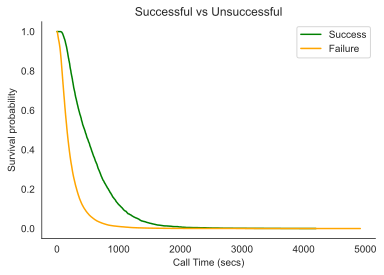

In [62]:
ax=plt.subplot(111)

kmf=KaplanMeierFitter()
kmf.fit(df_bank_survival[success]['duration'],df_bank_survival[success]['Response'],label="Success")
kmf.plot_survival_function(ax=ax, c="green",ci_show=False)

kmf=KaplanMeierFitter()
kmf.fit(df_bank_survival[failure]['duration'],df_bank_survival[failure]['Response'],label="Failure")
kmf.plot_survival_function(ax=ax, c="orange",ci_show=False)
ax.set_xlabel('Call Time (secs)')
ax.set_ylabel('Survival probability')
ax.set_title('Successful vs Unsuccessful')

sns.despine()
plt.show()

449.0


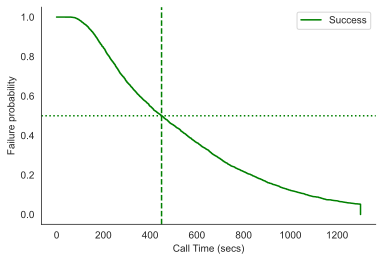

In [145]:
ax=plt.subplot(111)
kmf=KaplanMeierFitter()
kmf.fit(df_bank_survival[success]['duration_cap'],df_bank_survival[success]['Response'],label="Success")
kmf.plot_survival_function(ax=ax, c="green",ci_show=False)
plt.axvline(kmf.median_survival_time_,c='green',linestyle='--')
plt.axhline(0.5,c='green',linestyle=':')
ax.set_xlabel('Call Time (secs)')
ax.set_ylabel('Failure probability')
sns.despine()
plt.savefig("myplot.svg", transparent=True)
#axes.legend(title='Marital status', loc='lower left')
print(kmf.median_survival_time_)

In [135]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,4640,4640
37.0,1,1,0,0,4640
63.0,3,3,0,0,4639
64.0,1,1,0,0,4636
65.0,1,1,0,0,4635
...,...,...,...,...,...
3094.0,1,1,0,0,5
3183.0,1,1,0,0,4
3631.0,1,1,0,0,3


KeyError: 'KM_estimate'

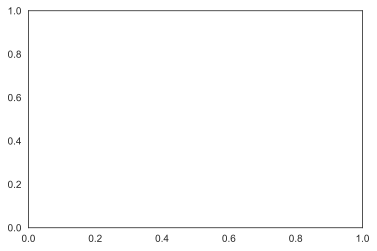

In [134]:
ax=plt.subplot(111)
kmf=KaplanMeierFitter()
kmf.fit(df_bank_survival[success]['duration'],df_bank_survival[success]['Response'],label="Success")
one_minus_survival = 1 - kmf.survival_function_
plt.step(one_minus_survival.index.values, one_minus_survival['KM_estimate'].values)

plt.axvline(kmf.median_survival_time_,c='green',linestyle='--')
ax.set_xlabel('Call Time (secs)')
ax.set_ylabel('Event probability')
sns.despine()
#axes.legend(title='Marital status', loc='lower left')


### We tried to analyze outliers in duration, and cap them for a succinct analysis

<AxesSubplot:xlabel='duration', ylabel='Count'>

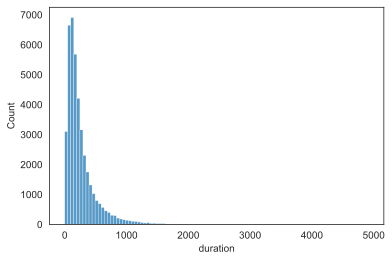

In [84]:
sns.histplot(df_bank_survival['duration'],bins=100)

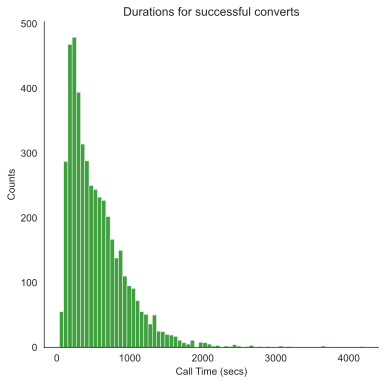

In [95]:
_, axes = plt.subplots(1,1,figsize=(6, 6))
sns.histplot(df_bank_survival[success]['duration'],color="green")
sns.despine()

axes.set_title('Durations for successful converts')
axes.set_xlabel('Call Time (secs)')
axes.set_ylabel('Counts')

plt.savefig("myplot.svg", transparent=True)

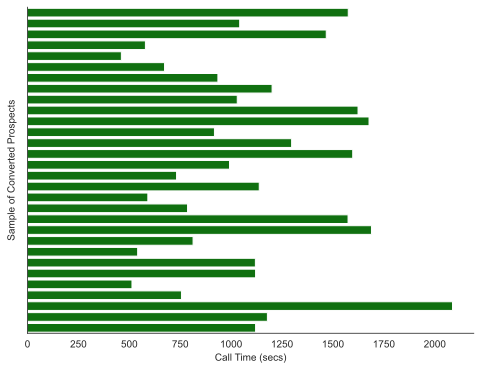

In [128]:
df_suc_dur=pd.DataFrame(df_bank_survival[success]['duration']).reset_index()
df_suc_dur['index']=df_suc_dur.index+1
df_suc_dur
#sns.barplot(df_bank_survival[success]['duration'].index(), y=df_bank_survival[success]['duration'], orient="horizontal")

_, plot = plt.subplots(1,1,figsize=(8, 6))
plot=sns.barplot(x="duration", y="index", data=df_suc_dur[0:30], orient="horizontal",color="green",ax=plot)
plot.set_yticklabels([])
plot.set_xlabel('Call Time (secs)')
plot.set_ylabel('Sample of Converted Prospects')

sns.despine()
plt.savefig("myplot.svg", transparent=True)


In [13]:
df_bank_survival['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration'>

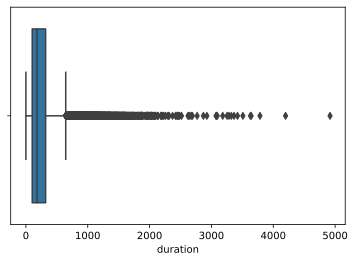

In [14]:
sns.boxplot(df_bank_survival['duration'])

In [15]:
df_bank_survival[df_bank_survival.duration>900]['duration']

37       1666
75       1575
83       1042
88       1467
164      2033
         ... 
41009    1032
41121    1166
41122     985
41123    1556
41164    1868
Name: duration, Length: 1281, dtype: int64

<AxesSubplot:xlabel='duration_cap'>

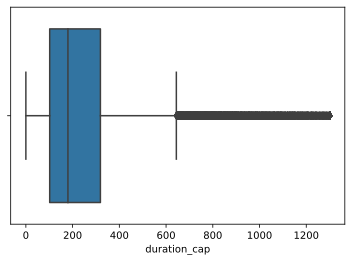

In [16]:
df_bank_survival['duration_cap']=df_bank_survival['duration'].apply(lambda x: 1300 if x>=1300 else x)
sns.boxplot(df_bank_survival['duration_cap'])

### We also tried to convert the duration to minutes

In [17]:
df_bank_survival['duration_min']=df_bank_survival['duration_cap'].apply(lambda x: int(np.round((x/60),0)))

In [18]:
df_bank_survival['duration_min']

0        4
1        2
2        4
3        3
4        5
        ..
41183    6
41184    6
41185    3
41186    7
41187    4
Name: duration_min, Length: 41188, dtype: int64

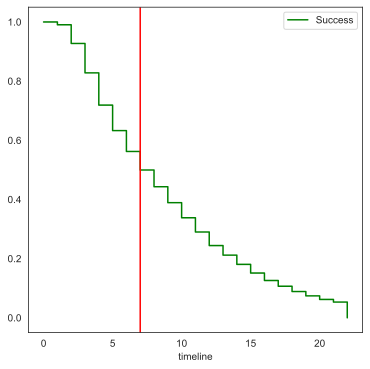

In [72]:
_, axes = plt.subplots(1,1,figsize=(6, 6))
kmf_s=KaplanMeierFitter()
kmf_s.fit(df_bank_survival[success]['duration_min'],df_bank_survival[success]['Response'],label="Success")
kmf_s.plot_survival_function(ax=axes, c="green",ci_show=False)
plt.axvline(kmf_s.median_survival_time_,c='red')

#kmf_f=KaplanMeierFitter()
#kmf_f.fit(df_bank_survival[failure]['duration_min'],df_bank_survival[failure]['Response'],label="Failure")
#kmf_f.plot_survival_function(ax=axes, c="orange",ci_show=False)
#plt.axvline(kmf_f.median_survival_time_,c='red')


In [20]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,4640,4640
37.0,1,1,0,0,4640
63.0,3,3,0,0,4639
64.0,1,1,0,0,4636
65.0,1,1,0,0,4635
...,...,...,...,...,...
3094.0,1,1,0,0,5
3183.0,1,1,0,0,4
3631.0,1,1,0,0,3


Text(0, 0.5, 'Conversion probability')

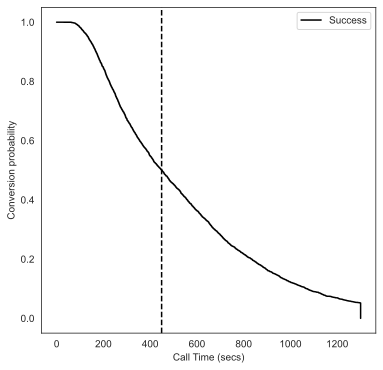

In [71]:
_, axes = plt.subplots(1,1,figsize=(6, 6))
kmf_s=KaplanMeierFitter()
kmf_s.fit(df_bank_survival[success]['duration_cap'],df_bank_survival[success]['Response'],label="Success")
kmf_s.plot_survival_function(ax=axes, c="black",ci_show=False)
plt.axvline(kmf_s.median_survival_time_,c='black',linestyle='--')

axes.set_xlabel('Call Time (secs)')
axes.set_ylabel('Conversion probability')

### Marital Status did not have major impact on when successful calls were converting

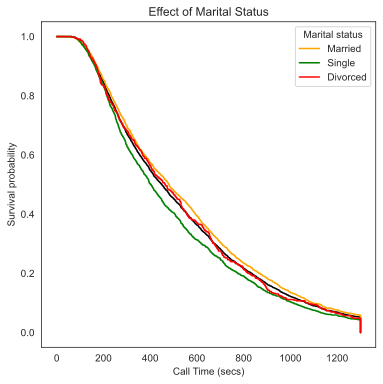

In [75]:
married=(df_bank_survival.marital=='married')
single=(df_bank_survival.marital=='single')
divorced=(df_bank_survival.marital=='divorced')

_, axes = plt.subplots(1,1,figsize=(6, 6))

kmf_s=KaplanMeierFitter()
kmf_s.fit(df_bank_survival[success]['duration_cap'],df_bank_survival[success]['Response'],label="")
kmf_s.plot_survival_function(ax=axes, c="black",ci_show=False)
#plt.axvline(kmf_s.median_survival_time_,c='red')

kmf_mar=KaplanMeierFitter()
kmf_mar.fit(df_bank_survival[success][married]['duration_cap'],df_bank_survival[success][married]['Response'],label="Married")
kmf_mar.plot_survival_function(ax=axes, c="orange",ci_show=False)
#plt.axvline(kmf_mar.median_survival_time_,c='red')

kmf_sin=KaplanMeierFitter()
kmf_sin.fit(df_bank_survival[success][single]['duration_cap'],df_bank_survival[success][single]['Response'],label="Single")
kmf_sin.plot_survival_function(ax=axes, c="green",ci_show=False)

kmf_div=KaplanMeierFitter()
kmf_div.fit(df_bank_survival[success][divorced]['duration_cap'],df_bank_survival[success][divorced]['Response'],label="Divorced")
kmf_div.plot_survival_function(ax=axes, c="red",ci_show=False)

axes.set_title('Effect of Marital Status')
axes.set_xlabel('Call Time (secs)')
axes.set_ylabel('Survival probability')
axes.legend(title='Marital status', loc='upper right')


### Profession

In [23]:
df_bank_survival['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

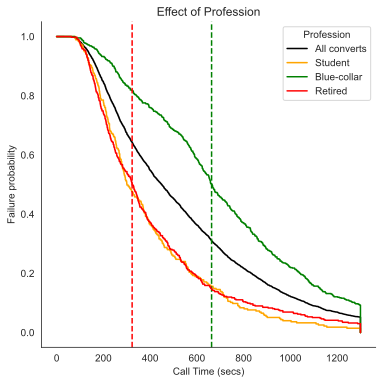

In [152]:
sns.set_style("white", {"axes.facecolor": (0, 0, 0, 0)})
sns.set_style("white", {"legend.facecolor": (0, 0, 0, 0)})


student=(df_bank_survival.job=='student')
blue_collar=(df_bank_survival.job=='blue-collar')
retired=(df_bank_survival.job=='retired')
sns.set_style("white")

_, axes = plt.subplots(1,1,figsize=(6, 6))

kmf_s=KaplanMeierFitter()
kmf_s.fit(df_bank_survival[success]['duration_cap'],df_bank_survival[success]['Response'],label="All converts")
kmf_s.plot_survival_function(ax=axes, c="black",ci_show=False)
#plt.axvline(kmf_s.median_survival_time_,c='red')

kmf1=KaplanMeierFitter()
kmf1.fit(df_bank_survival[success][student]['duration_cap'],df_bank_survival[success][student]['Response'],label="Student")
kmf1.plot_survival_function(ax=axes, c="orange",ci_show=False)
#plt.axvline(kmf_mar.median_survival_time_,c='red')

kmf2=KaplanMeierFitter()
kmf2.fit(df_bank_survival[success][blue_collar]['duration_cap'],df_bank_survival[success][blue_collar]['Response'],label="Blue-collar")
kmf2.plot_survival_function(ax=axes, c="green",ci_show=False)
plt.axvline(kmf2.median_survival_time_,c='green',linestyle='--')


kmf3=KaplanMeierFitter()
kmf3.fit(df_bank_survival[success][retired]['duration_cap'],df_bank_survival[success][retired]['Response'],label="Retired")
kmf3.plot_survival_function(ax=axes, c="red",ci_show=False)
plt.axvline(kmf3.median_survival_time_,c='red',linestyle='--')

sns.despine()
axes.set_title('Effect of Profession')
axes.set_xlabel('Call Time (secs)')
axes.set_ylabel('Failure probability')
axes.legend(title='Profession', loc='upper right')

plt.savefig("myplot.svg", transparent=True)


### Education 

In [27]:
df_bank_survival['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [28]:
df_bank_survival['education_mod']=df_bank_survival['education'].map({'university.degree':'university_graduate','high.school':'school_passout','basic.9y':'school_dropout','basic.4y':'school_dropout','basic.6y':'school_dropout','professional.course':'advanced_degree','unknown':'unknown','illiterate':'illiterate'})

In [29]:
df_bank_survival['education_mod']

0             school_dropout
1             school_passout
2             school_passout
3             school_dropout
4             school_passout
                ...         
41183        advanced_degree
41184        advanced_degree
41185    university_graduate
41186        advanced_degree
41187        advanced_degree
Name: education_mod, Length: 41188, dtype: object

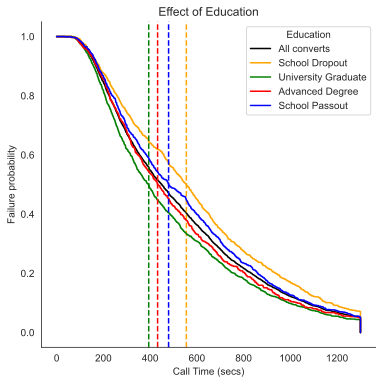

In [151]:
school_dropout=(df_bank_survival.education_mod=='school_dropout')
university_graduate=(df_bank_survival.education_mod=='university_graduate')
school_passout=(df_bank_survival.education_mod=='school_passout')
advanced_degree=(df_bank_survival.education_mod=='advanced_degree')

_, axes = plt.subplots(1,1,figsize=(6, 6))

kmf_s=KaplanMeierFitter()
kmf_s.fit(df_bank_survival[success]['duration_cap'],df_bank_survival[success]['Response'],label="All converts")
kmf_s.plot_survival_function(ax=axes, c="black",ci_show=False)
#plt.axvline(kmf_s.median_survival_time_,c='red')

kmf1=KaplanMeierFitter()
kmf1.fit(df_bank_survival[success][school_dropout]['duration_cap'],df_bank_survival[success][school_dropout]['Response'],label="School Dropout")
kmf1.plot_survival_function(ax=axes, c="orange",ci_show=False)
plt.axvline(kmf1.median_survival_time_,c='orange',linestyle='--')

kmf2=KaplanMeierFitter()
kmf2.fit(df_bank_survival[success][university_graduate]['duration_cap'],df_bank_survival[success][university_graduate]['Response'],label="University Graduate")
kmf2.plot_survival_function(ax=axes, c="green",ci_show=False)
plt.axvline(kmf2.median_survival_time_,c='green',linestyle='--')


kmf3=KaplanMeierFitter()
kmf3.fit(df_bank_survival[success][advanced_degree]['duration_cap'],df_bank_survival[success][advanced_degree]['Response'],label="Advanced Degree")
kmf3.plot_survival_function(ax=axes, c="red",ci_show=False)
plt.axvline(kmf3.median_survival_time_,c='red',linestyle='--')

kmf4=KaplanMeierFitter()
kmf4.fit(df_bank_survival[success][school_passout]['duration_cap'],df_bank_survival[success][school_passout]['Response'],label="School Passout")
kmf4.plot_survival_function(ax=axes, c="blue",ci_show=False)
plt.axvline(kmf4.median_survival_time_,c='blue',linestyle='--')

sns.despine()
axes.set_title('Effect of Education')
axes.set_xlabel('Call Time (secs)')
axes.set_ylabel('Failure probability')
axes.legend(title='Education', loc='lower left')
axes.legend(title='Education', loc='upper right')

plt.savefig("myplot.svg", transparent=True)


### Old vs New Contacts

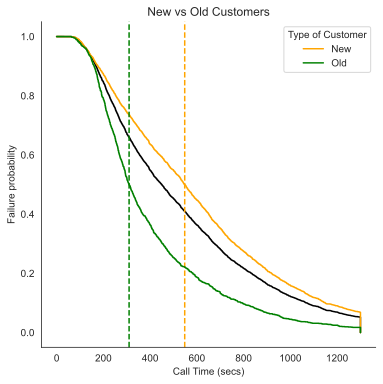

In [159]:
## Add for old contact vs new contact

df_bank_survival['is_new']=df_bank_survival['previous'].apply(lambda x: 'new' if x==0 else 'old')
df_bank_survival.head()

new=(df_bank_survival.is_new=='new')
old=(df_bank_survival.is_new=='old')

_, axes = plt.subplots(1,1,figsize=(6, 6))

kmf_s=KaplanMeierFitter()
kmf_s.fit(df_bank_survival[success]['duration_cap'],df_bank_survival[success]['Response'],label="")
kmf_s.plot_survival_function(ax=axes, c="black",ci_show=False)

kmf1=KaplanMeierFitter()
kmf1.fit(df_bank_survival[success][new]['duration_cap'],df_bank_survival[success][new]['Response'],label="New")
kmf1.plot_survival_function(ax=axes, c="orange",ci_show=False)
plt.axvline(kmf1.median_survival_time_,c='orange',linestyle='--')

kmf2=KaplanMeierFitter()
kmf2.fit(df_bank_survival[success][old]['duration_cap'],df_bank_survival[success][old]['Response'],label="Old")
kmf2.plot_survival_function(ax=axes, c="green",ci_show=False)
plt.axvline(kmf2.median_survival_time_,c='green',linestyle='--')

sns.despine()
axes.set_title('New vs Old Customers')
axes.set_xlabel('Call Time (secs)')
axes.set_ylabel('Failure probability')
axes.legend(title='Type of Customer', loc='upper right')

plt.savefig("myplot.svg", transparent=True)


### Mode of Contact

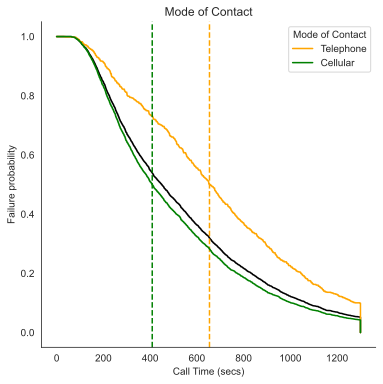

In [160]:
## Add for celular and telephone
telephone=(df_bank_survival.contact=='telephone')
cellular=(df_bank_survival.contact=='cellular')

_, axes = plt.subplots(1,1,figsize=(6, 6))

kmf_s=KaplanMeierFitter()
kmf_s.fit(df_bank_survival[success]['duration_cap'],df_bank_survival[success]['Response'],label="")
kmf_s.plot_survival_function(ax=axes, c="black",ci_show=False)

kmf1=KaplanMeierFitter()
kmf1.fit(df_bank_survival[success][telephone]['duration_cap'],df_bank_survival[success][telephone]['Response'],label="Telephone")
kmf1.plot_survival_function(ax=axes, c="orange",ci_show=False)
plt.axvline(kmf1.median_survival_time_,c='orange',linestyle='--')

kmf2=KaplanMeierFitter()
kmf2.fit(df_bank_survival[success][cellular]['duration_cap'],df_bank_survival[success][cellular]['Response'],label="Cellular")
kmf2.plot_survival_function(ax=axes, c="green",ci_show=False)
plt.axvline(kmf2.median_survival_time_,c='green',linestyle='--')

sns.despine()
axes.set_title('Mode of Contact')
axes.set_xlabel('Call Time (secs)')
axes.set_ylabel('Failure probability')
axes.legend(title='Mode of Contact', loc='upper right')

plt.savefig("myplot.svg", transparent=True)

In [33]:
df_bank_survival['contact'].value_counts()


cellular     26144
telephone    15044
Name: contact, dtype: int64

In [34]:
## Repeat survival analysis for calls

39848346*0.025


996208.65

### Previous Outcome

In [163]:
df_bank_survival[success]['poutcome'].value_counts()

nonexistent    3141
success         894
failure         605
Name: poutcome, dtype: int64

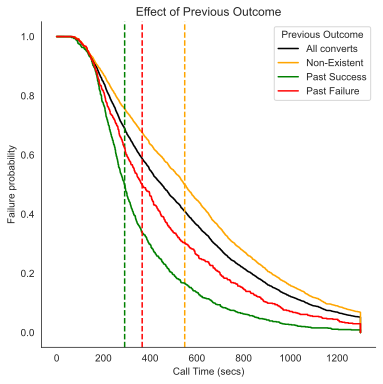

In [174]:
## Previous outcome
## Month

nonexistent=(df_bank_survival.poutcome=='nonexistent')
p_success=(df_bank_survival.poutcome=='success')
p_failure=(df_bank_survival.poutcome=='failure')

_, axes = plt.subplots(1,1,figsize=(6, 6))

kmf_s=KaplanMeierFitter()
kmf_s.fit(df_bank_survival[success]['duration_cap'],df_bank_survival[success]['Response'],label="All converts")
kmf_s.plot_survival_function(ax=axes, c="black",ci_show=False)
#plt.axvline(kmf_s.median_survival_time_,c='red')

kmf1=KaplanMeierFitter()
kmf1.fit(df_bank_survival[success][nonexistent]['duration_cap'],df_bank_survival[success][nonexistent]['Response'],label="Non-Existent")
kmf1.plot_survival_function(ax=axes, c="orange",ci_show=False)
plt.axvline(kmf1.median_survival_time_,c='orange',linestyle='--')

kmf2=KaplanMeierFitter()
kmf2.fit(df_bank_survival[success][p_success]['duration_cap'],df_bank_survival[success][p_success]['Response'],label="Past Success")
kmf2.plot_survival_function(ax=axes, c="green",ci_show=False)
plt.axvline(kmf2.median_survival_time_,c='green',linestyle='--')


kmf3=KaplanMeierFitter()
kmf3.fit(df_bank_survival[success][p_failure]['duration_cap'],df_bank_survival[success][p_failure]['Response'],label="Past Failure")
kmf3.plot_survival_function(ax=axes, c="red",ci_show=False)
plt.axvline(kmf3.median_survival_time_,c='red',linestyle='--')

sns.despine()
axes.set_title('Effect of Previous Outcome')
axes.set_xlabel('Call Time (secs)')
axes.set_ylabel('Failure probability')
axes.legend(title='Previous Outcome', loc='upper right')

plt.savefig("myplot.svg", transparent=True)

### Month

In [168]:
df_bank_survival[success]['month'].value_counts()

may    886
aug    655
jul    649
jun    559
apr    539
nov    416
oct    315
mar    276
sep    256
dec     89
Name: month, dtype: int64

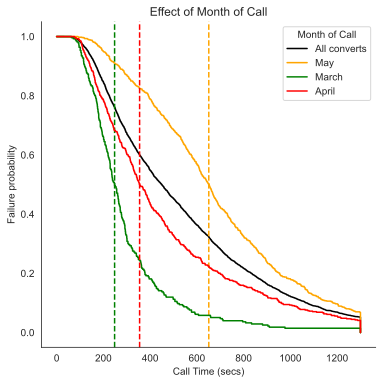

In [173]:

may=(df_bank_survival.month=='may')
march=(df_bank_survival.month=='mar')
april=(df_bank_survival.month=='apr')

_, axes = plt.subplots(1,1,figsize=(6, 6))

kmf_s=KaplanMeierFitter()
kmf_s.fit(df_bank_survival[success]['duration_cap'],df_bank_survival[success]['Response'],label="All converts")
kmf_s.plot_survival_function(ax=axes, c="black",ci_show=False)
#plt.axvline(kmf_s.median_survival_time_,c='red')

kmf1=KaplanMeierFitter()
kmf1.fit(df_bank_survival[success][may]['duration_cap'],df_bank_survival[success][may]['Response'],label="May")
kmf1.plot_survival_function(ax=axes, c="orange",ci_show=False)
plt.axvline(kmf1.median_survival_time_,c='orange',linestyle='--')

kmf2=KaplanMeierFitter()
kmf2.fit(df_bank_survival[success][march]['duration_cap'],df_bank_survival[success][march]['Response'],label="March")
kmf2.plot_survival_function(ax=axes, c="green",ci_show=False)
plt.axvline(kmf2.median_survival_time_,c='green',linestyle='--')


kmf3=KaplanMeierFitter()
kmf3.fit(df_bank_survival[success][april]['duration_cap'],df_bank_survival[success][april]['Response'],label="April")
kmf3.plot_survival_function(ax=axes, c="red",ci_show=False)
plt.axvline(kmf3.median_survival_time_,c='red',linestyle='--')

sns.despine()
axes.set_title('Effect of Month of Call')
axes.set_xlabel('Call Time (secs)')
axes.set_ylabel('Failure probability')
axes.legend(title='Month of Call', loc='upper right')

plt.savefig("myplot.svg", transparent=True)